In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Crear DataFrame
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y
wine_df['wine_class'] = [target_names[i] for i in y]

print(f"📊 Forma del dataset: {wine_df.shape}")
print(f"🎯 Número de características: {len(feature_names)}")
print(f"🍇 Clases de vino: {target_names}")
print(f"📈 Distribución de clases:")
print(wine_df['wine_class'].value_counts())

📊 Forma del dataset: (178, 15)
🎯 Número de características: 13
🍇 Clases de vino: ['class_0' 'class_1' 'class_2']
📈 Distribución de clases:
wine_class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64


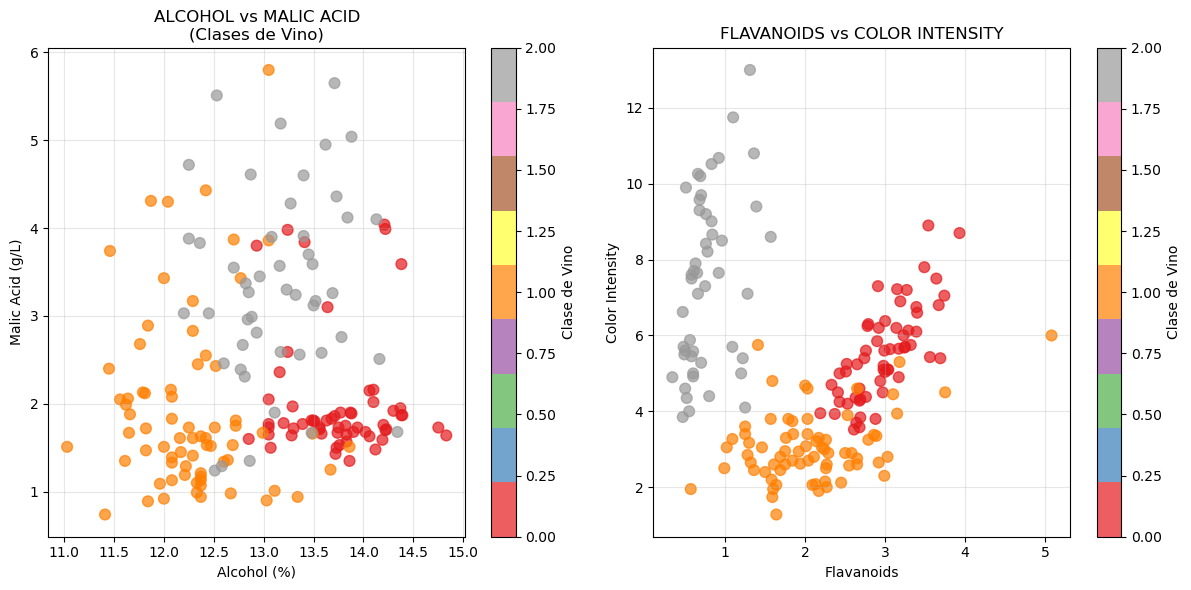

In [8]:
plt.figure(figsize=(18, 6))

# Gráfica 1: Alcohol vs Malic acid (dos características importantes)
plt.subplot(1, 3, 1)
scatter = plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], 
                     c=wine_df['target'], cmap='Set1', alpha=0.7, s=60)
plt.colorbar(scatter, label='Clase de Vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('Malic Acid (g/L)')
plt.title('ALCOHOL vs MALIC ACID\n(Clases de Vino)')
plt.grid(True, alpha=0.3)

# Gráfica 2: Flavonoids vs Color intensity
plt.subplot(1, 3, 2)
scatter = plt.scatter(wine_df['flavanoids'], wine_df['color_intensity'], 
                     c=wine_df['target'], cmap='Set1', alpha=0.7, s=60)
plt.colorbar(scatter, label='Clase de Vino')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('FLAVANOIDS vs COLOR INTENSITY')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()



🔬 EXPERIMENTO 1: FastICA con 2 Componentes Independientes
📊 Resultados FastICA 2 componentes:
   Forma de componentes: (178, 2)
   Número de iteraciones: 5


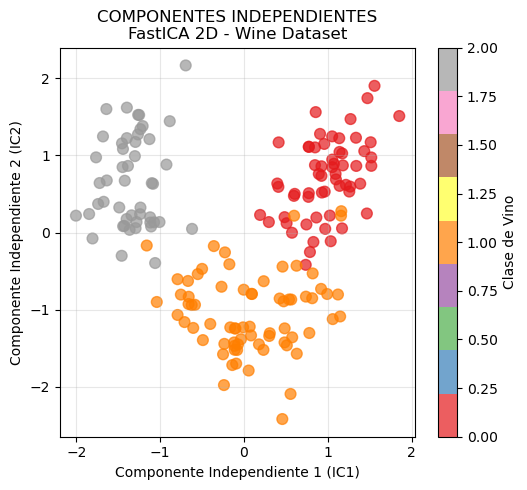

In [7]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 1: FastICA con 2 Componentes Independientes")
print("="*60)

# Aplicar FastICA con 2 componentes
ica_2 = FastICA(n_components=2, random_state=42, max_iter=1000)
X_ica_2 = ica_2.fit_transform(X_scaled)

print("📊 Resultados FastICA 2 componentes:")
print(f"   Forma de componentes: {X_ica_2.shape}")
print(f"   Número de iteraciones: {ica_2.n_iter_}")

# Crear DataFrame con componentes ICA
ica_df_2 = pd.DataFrame(X_ica_2, columns=['IC1', 'IC2'])
ica_df_2['target'] = y
ica_df_2['wine_class'] = [target_names[i] for i in y]

# Visualización de componentes ICA
plt.figure(figsize=(15, 5))

# Gráfica 1: Componentes ICA
plt.subplot(1, 3, 1)
scatter = plt.scatter(ica_df_2['IC1'], ica_df_2['IC2'], 
                     c=ica_df_2['target'], cmap='Set1', alpha=0.7, s=60)
plt.colorbar(scatter, label='Clase de Vino')
plt.xlabel('Componente Independiente 1 (IC1)')
plt.ylabel('Componente Independiente 2 (IC2)')
plt.title('COMPONENTES INDEPENDIENTES\nFastICA 2D - Wine Dataset')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()